# **Week 4**
### Sequence Models And Literature

<br>

---
***Introduction To Text Generation***  
Repeatedly treat the accumulated sequence as the input, and the next word as the output(prediction).

- Larger dataset tend to result in better prediction result.
   


<br><br>

---
***Resources***

RNN을 사용한 텍스트 생성 https://www.tensorflow.org/text/tutorials/text_generation

Shakespeare Dataset https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt

<br><br>

---
## **Lab 1**
#### Traditional Irish Song

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

---
**Dataset Preparization**

In [2]:
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# List of sentences in lowercase
corpus = data.lower().split("\n")

# Construct dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

# Add 1 to consider OOVs
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [6]:
input_sequences = []

# Unpack line by line
for line in corpus:
    # Convert from word sequences to integer token sequences
    token_list = tokenizer.texts_to_sequences([line])[0]

    for i in range(1, len(token_list)):
        # Sequence of the first 2 ~ every word of the sentence
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences to the longest one
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Use the last word of the phrase as y, and the rest as x
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

# One hot encoding of the labels
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [7]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

print(xs[5])
print(ys[5])
print(xs[6])
print(ys[6])

print(tokenizer.word_index)

4
2
66
8
67
68
69
70
[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  0  0  4  2 66  8 67 68 69]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

---
**Construct Model And Train**

In [10]:
model = Sequential()

model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(xs, ys, epochs=500, verbose=1)

Epoch 1/500
15/15 [==============================] - 4s 10ms/step - loss: 5.5677 - accuracy: 0.0397
Epoch 2/500
15/15 [==============================] - 0s 10ms/step - loss: 5.5412 - accuracy: 0.0618
Epoch 3/500
15/15 [==============================] - 0s 10ms/step - loss: 5.4800 - accuracy: 0.0552
Epoch 4/500
15/15 [==============================] - 0s 10ms/step - loss: 5.3276 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 10ms/step - loss: 5.1362 - accuracy: 0.0486
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0631 - accuracy: 0.0486
Epoch 7/500
15/15 [==============================] - 0s 11ms/step - loss: 5.0148 - accuracy: 0.0574
Epoch 8/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9796 - accuracy: 0.0640
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9419 - accuracy: 0.0618
Epoch 10/500
15/15 [==============================] - 0s 10ms/step - loss: 4.8916 - accuracy: 0.0662

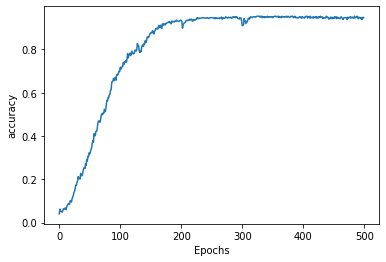

In [11]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

plot_graphs(history, 'accuracy')

---
**Writing Task**

In [19]:
seed_text = "Laurence went to dublin"
next_words = 50
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 
    # Passed into the model
    #predicted = model.predict_classes(token_list, verbose=0)
    predicted = model.predict(token_list, verbose=0)
    predicted = predicted.argmax(axis=-1)

    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    
    # Append the prediction
    seed_text += " " + output_word

print(seed_text)

Laurence went to dublin round merry til room a acres of a whirligig wall man relations relations and academy taras ask ask jig hall hall jig eyes strangled glisten glisten wall suppose merry by the wall wall wall wall time a rose reel a rose rose rose tea as and rose hoops hoops able


**Trial 1**  
Laurence went to dublin round merry til room a acres of a whirligig wall man relations relations and academy taras ask ask jig hall hall jig eyes strangled glisten glisten wall suppose merry by the wall wall wall wall time a rose reel a rose rose rose tea as and rose hoops hoops able taras hall hall jig hall hall hall glisten glisten glisten suppose their glisten glisten wall entangled me a wall out and a rose man again again again learn academy taras jig glisten jig hall jig lanigan groups a hall jig jig jig groups ball jig and and chanters lanigans ball

<br>

**Trial 2**  
Laurence went to dublin round merry til room a acres of a whirligig wall man relations relations and academy taras ask ask jig hall hall jig eyes strangled glisten glisten wall suppose merry by the wall wall wall wall time a rose reel a rose rose rose tea as and rose hoops hoops able taras hall hall jig hall hall hall glisten glisten glisten suppose their glisten glisten wall entangled me a wall out and a rose man again again again learn academy taras jig glisten jig hall jig lanigan groups a hall jig jig jig groups ball jig and and chanters lanigans ball

<br>

*Q) 이미 train 된 model로 prediction을 수행한다면, 여러 번 반복해도 같은 결과가 나오는 게 맞을 것 같고 실제로 돌려 봐도 그런 결과가 나오는데, 강의에서는 왜 서로 다른 sentences가 생성되었는지. Train을 매번 다시 시켰다는 의미...?*

<br><br>

---
## **Lab 2**
#### Irish Lyrics: Enhanced Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

# irish-lyrics-eof.txt
!gdown --id 15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT

Downloading...
From: https://drive.google.com/uc?id=15UqmiIm0xwh9mt0IYq2z3jHaauxQSTQT
To: /content/irish-lyrics-eof.txt
100% 69.0k/69.0k [00:00<00:00, 27.0MB/s]


---
**Dataset Preparization**

In [2]:
data = open('./irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [3]:
input_sequences = []

for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]

	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [4]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

print(xs[6])
print(ys[6])
print(xs[5])
print(ys[5])

print(tokenizer.word_index)

8
1
71
6
713
39
1790
1791
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]
[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]
{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true':

---
**Construct Model And Train**

In [5]:
model = Sequential()

model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')

history = model.fit(xs, ys, epochs=100, verbose=1)

print(model)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
377/377 [==============================] - 16s 19ms/step - loss: 6.6732 - accuracy: 0.0700
Epoch 2/100
377/377 [==============================] - 7s 19ms/step - loss: 5.7706 - accuracy: 0.1106
Epoch 3/100
377/377 [==============================] - 7s 19ms/step - loss: 4.9013 - accuracy: 0.1656
Epoch 4/100
377/377 [==============================] - 7s 19ms/step - loss: 3.9579 - accuracy: 0.2408
Epoch 5/100
377/377 [==============================] - 7s 20ms/step - loss: 3.0601 - accuracy: 0.3523
Epoch 6/100
377/377 [==============================] - 7s 19ms/step - loss: 2.3501 - accuracy: 0.4688
Epoch 7/100
377/377 [==============================] - 7s 19ms/step - loss: 1.8601 - accuracy: 0.5656
Epoch 8/100
377/377 [==============================] - 7s 19ms/step - loss: 1.4996 - accuracy: 0.6445
Epoch 9/100
377/377 [==============================] - 7s 19ms/step - loss: 1.2525 - accuracy: 0.7022
Epoch 10/100
377/377 [==============================] - 7s 19ms/step - loss: 1.08

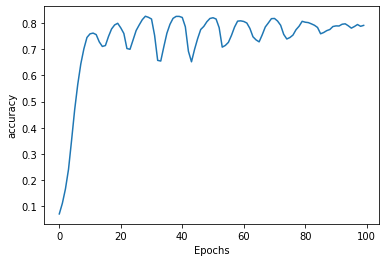

In [6]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

---
**Writing Task**

In [11]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
 
    #predicted = model.predict_classes(token_list, verbose=0)
    predicted = model.predict(token_list, verbose=0)
    predicted = predicted.argmax(axis=-1)
 
    output_word = ""

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break

    seed_text += " " + output_word


print(seed_text)

I've got a bad feeling about this love you so alas i well the shure with its valley so fair on the right to dublin down by the river me and it be want of the call birds nest had is the rose of tralee is a tower of some father love and the better than them gone and the wild rover of love a stone might be that they were shining vale so boys again began to gather or sleeping gone in the women so were moonlight again to paint her picture summers night from the banks of the bann boyne right ponchartrain each true love


**Trial 1**  
I've got a bad feeling about this love you so alas i well the shure with its valley so fair on the right to dublin down by the river me and it be want of the call birds nest had is the rose of tralee is a tower of some father love and the better than them gone and the wild rover of love a stone might be that they were shining vale so boys again began to gather or sleeping gone in the women so were moonlight again to paint her picture summers night from the banks of the bann boyne right ponchartrain each true love

<br>

**Trial 2**  
I've got a bad feeling about this love you so alas i well the shure with its valley so fair on the right to dublin down by the river me and it be want of the call birds nest had is the rose of tralee is a tower of some father love and the better than them gone and the wild rover of love a stone might be that they were shining vale so boys again began to gather or sleeping gone in the women so were moonlight again to paint her picture summers night from the banks of the bann boyne right ponchartrain each true love